In [1]:
import pandas as pd
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt 

In [2]:
import sys 
sys.path.append('/users/loulou/cedia/simfin/Model')

In [3]:
import simfin

In [4]:
test = simfin.macro()

In [5]:

test.rates

,tcam_long,tcam_last10,tcam_last5
consumption,0.0207275,0.0205988,0.0216325
gdp,0.0204202,0.0230542,0.026988
wages,0.0159262,0.0229263,0.0279008
inflation,0.0257067,0.015073,0.0131042


In [6]:
x = simfin.simulator(2017,2060)


In [ ]:
x.once()

In [8]:

x.revenue.collect(2017)
sum(x.revenue.accounts.values()) + sum(x.transfers.accounts.values())

102884.0

In [9]:
x.history

2006    2007    2008    2009    2010  \
account         variable                                                    
personal        net_taxes           13190   14832   14887   14057   13137   
                fiscal_credits       3276    3648    3761    3892    4215   
corporate       net_taxes            3578    3388    3379    2546    2261   
                fiscal_credits       1209    1391    1440    1630    1617   
fss             total                5563    5601    5958    6251    5605   
property_taxes  total                   0       0       0       0    1469   
consumption     total               12609   12851   13146   13595   13466   
permits         total                1506    1641    1652    1714    1878   
gov_enterprises total                4554    6304    5438    5649    5536   
other_taxes     total                3427    3570    4350    4126    7332   
equalization    total                4798    5539    7160    8028    8355   
health_transfer total                3185    3649    3925    3740    4148   
other_transfers total                3139    2782    3648    3313    4607   
health          total               21984   23782   25416   26718   29666   
education       total               13045   13436   14445   14686   17725   
economy         total                6781    7154    8138    8525    8947   
family          total                5249    5280    5439    5538    5773   
justice         total                5379    5657    5592    6201    6611   
debt_service    total                7559    7894    8064    8131    7844   
genfund         balance_start           0       0     584    1233    1952   
                revenue                 0     581     413     637     665   
                returns                 0       3      36     -50      60   
                debt_repayment          0       0       0       0       0   
                balance_end             0     584    1233    1952    2677   
reserve         balance_start           0       0       0    2301     433   
                withdrawal              0       0       0    1845     433   
                budget_balance          0       0       0       0   -3174   
                contribution            0       0       0     -23       0   
                balance_end           950    1300    1817     433       0   
debt            balance_start       89508   92011  116537  120527  133224   
                reconciliation       6492   27068    8631   17671   13424   
                repayment               0       0       0       0       0   
                debt_instruments    96000  119079  125168  138198  146648   
                depreciation_fund    3989    4394    4641    4974    5594   
                debt_ppp                0       0       0       0       0   
                balance_end         92011  114685  120527  133224  141054   
                pension_oblig       37182   33596   31159   28708   29921   
                gross_debt_reduct    3429    6100    2438       0    4980   
                gross_debt         125764  141597  148015  159980  163318   

                                     2011    2012    2013    2014    2015  \
account         variable                                                    
personal        net_taxes           14603   15525   21506   22473   23460   
                fiscal_credits       4232    4513    3564    3730    4087   
corporate       net_taxes            2079    2465    4281    3611    3957   
                fiscal_credits       1847    1747    1753    2014    1880   
fss             total                6070    6640    6391    6251    6397   
property_taxes  total                1492    1526    1577    1786    1954   
consumption     total               14807   16620   16079   17135   17657   
permits         total                2051    2147    2084    2198    2521   
gov_enterprises total                5488    5431    3949    6193    6168   
other_taxes     total           

In [6]:
table = pd.DataFrame(index=np.arange(2017,2060),columns=['reference','pop constante','prix constant'])

In [7]:

macro = simfin.macro()

In [8]:
x = simfin.simulate(2017,2060)
x.missions.health.set_growth_assumptions(macro,year_converge=2030,iprice=True,ipop=True)
table['reference'] = [x.missions.health.collect(x.pop,t) for t in range(2017,2060)]

alignment factor for health :  1.1881625020599549


In [9]:
x = simfin.simulate(2017,2060)
x.missions.health.set_growth_assumptions(macro,year_converge=2030,iprice=True,ipop=False)
table['pop constante'] = [x.missions.health.collect(x.pop,t) for t in range(2017,2060)]

alignment factor for health :  1.1881625020599549


In [10]:
x = simfin.simulate(2017,2060)
x.missions.health.set_growth_assumptions(macro,year_converge=2030,iprice=False,ipop=True)
table['prix constant'] = [x.missions.health.collect(x.pop,t) for t in range(2017,2060)]

alignment factor for health :  1.1881625020599549


In [11]:
x.missions.base_rates

account          variable         
personal         net_taxes            0.030071
                 fiscal_credits       0.022458
corporate        net_taxes            0.135114
                 fiscal_credits      -0.016948
fss              total               -0.001191
property_taxes   total               -0.010558
consumption      total                0.035296
permits          total                0.115842
gov_enterprises  total               -0.020965
other_taxes      total                0.043869
equalization     total                0.047873
health_transfer  total                0.036075
other_transfers  total                0.050575
health           total                0.024478
education        total                0.027028
economy          total                0.051523
family           total                0.009120
justice          total                0.022235
debt_service     total               -0.032148
genfund          balance_start        0.177613
                 revenue 

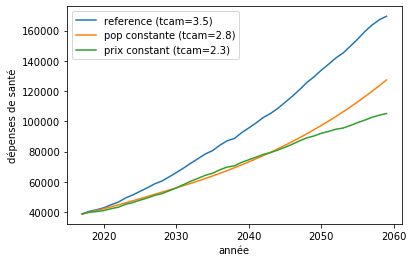

In [12]:
plt.figure()
for c in table.columns:
    tcam = (table.loc[2059,c]/table.loc[2017,c])**(1/(2059-2017+1))-1.0
    plt.plot(table.index,table[c],label=c+' (tcam='+str(np.round(tcam*100,1))+')')
plt.xlabel('année')
plt.ylabel('dépenses de santé')
plt.legend()
plt.show()

In [17]:
table.loc[2019,'reference']

41508.35317109659

In [14]:

diag = x.pop.loc[x.pop.index.get_level_values(2)].groupby('age').sum()

In [15]:
diag.loc[diag.index<=25,:]

,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061
age,,,,,,,,,,,,,,,,,,,,,
5,90336.003897,90521.116609,89274.858562,88047.975312,87093.897552,83934.722927,81445.848309,81860.488234,81934.721371,82044.389665,...,84650.824282,85514.699062,84367.598317,85485.634286,84764.372653,84706.483179,84796.712553,84056.208226,85214.172608,84239.279522
6,90416.052637,90201.944961,90500.924167,87104.501811,88031.126440,87077.821479,83934.722927,81445.848309,81860.488234,81794.181540,...,83934.919089,84650.824282,85146.101222,83986.706225,85296.087425,84210.357145,84531.469784,84620.785764,84056.208226,85214.172608
7,91409.657625,90402.789383,90201.944961,90500.924167,87104.501811,87721.748167,87077.821479,83900.921313,81445.848309,81860.488234,...,84407.019736,83934.919089,84650.824282,84961.802301,83986.706225,84727.446842,84210.357145,84356.456389,84620.785764,84056.208226
8,91853.928133,91045.004936,90288.203309,89947.674323,90495.920535,87104.501811,87446.824830,87077.821479,83084.364069,81445.848309,...,83372.061250,84058.949552,83934.919089,84484.516179,84961.802301,83986.706225,84727.446842,84025.685309,84356.456389,84620.785764
9,90090.854630,91774.878835,91045.004936,90288.203309,89863.944559,90495.920535,86808.347131,87446.824830,87077.821479,83077.370632,...,83293.860701,83372.061250,83710.879367,83934.919089,84318.208076,84961.802301,83986.706225,84727.446842,83841.013473,84181.442994
10,87112.040887,90060.956119,91716.658217,91045.004936,89758.439743,89863.944559,90495.920535,86592.199474,87413.127087,86487.897777,...,82667.958834,82946.802948,83372.061250,83710.879367,83934.919089,84318.208076,84961.802301,83986.706225,84348.353120,83841.013473
11,83879.072393,87112.040887,90060.956119,91697.251345,91045.004936,89751.205241,89863.944559,90488.348370,86592.199474,87354.617724,...,81997.151645,82667.958834,82946.802948,83194.673885,83536.844275,83934.919089,84151.899973,84961.802301,83986.706225,84348.353120
12,80657.110601,83787.238153,87112.040887,90060.956119,91697.251345,91045.004936,89710.281643,89594.096893,90488.348370,86592.199474,...,81649.746547,81997.151645,82667.958834,82946.802948,82839.899157,83536.844275,83934.919089,84151.899973,84961.802301,83986.706225
13,80476.000326,80568.712786,83595.740989,87112.040887,90060.956119,91697.251345,91045.004936,89710.281643,89594.096893,90472.622671,...,80914.102063,81486.119800,81997.151645,82495.374368,82599.745195,82839.899157,83536.844275,83934.919089,84151.899973,84777.503381


In [19]:
table = pd.DataFrame(index=np.arange(2017,2060),columns=['reference','pop constante','prix constant'])


In [20]:
x = simfin.simulate(2017,2060)
x.missions.education.set_growth_assumptions(macro,iprice=True,ipop=True,price_hs=0.018,price_college=0.018)
table['reference'] = [x.missions.education.collect(x.pop,t) for t in range(2017,2060)]


alignment factor for education :  1.0912533207224828


In [21]:
x = simfin.simulate(2017,2060)
x.missions.education.set_growth_assumptions(macro,iprice=False,ipop=True,price_hs=0.018,price_college=0.018)
table['prix constant'] = [x.missions.education.collect(x.pop,t) for t in range(2017,2060)]

alignment factor for education :  1.0912533207224828


In [22]:
x = simfin.simulate(2017,2060)
x.missions.education.set_growth_assumptions(macro,iprice=True,ipop=False,price_hs=0.03,price_college=0.03)
table['pop constante'] = [x.missions.education.collect(x.pop,t) for t in range(2017,2060)]

alignment factor for education :  1.0912533207224828


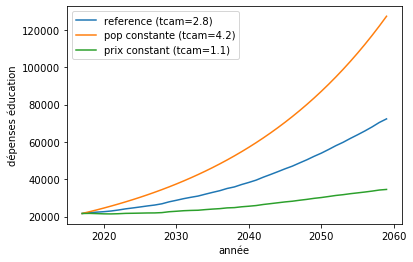

In [23]:
plt.figure()
for c in table.columns:
    tcam = (table.loc[2059,c]/table.loc[2017,c])**(1/(2059-2017+1))-1.0
    plt.plot(table.index,table[c],label=c+' (tcam='+str(np.round(tcam*100,1))+')')
plt.xlabel('année')
plt.ylabel('dépenses éducation')
plt.legend()
plt.show()

In [24]:
diag = x.pop.loc[x.pop.index.get_level_values(2)].groupby('age').sum()
low = diag[diag.index<=16]
high = diag[diag.index>=17]


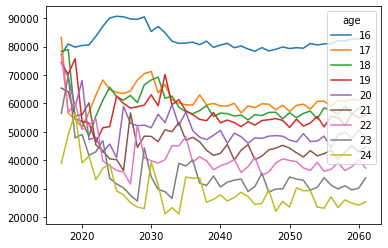

In [25]:

diag[(diag.index<=24) & (diag.index>=16)].transpose().plot()

In [26]:
table = pd.DataFrame(index=np.arange(2017,2060),columns=['justice','family','economy'])
table['justice'] = [x.missions.justice.collect(t) for t in range(2017,2060)]
table['family'] = [x.missions.family.collect(t) for t in range(2017,2060)]
table['economy'] = [x.missions.economy.collect(t) for t in range(2017,2060)]


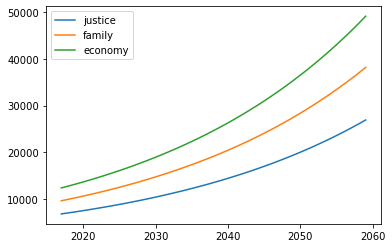

In [27]:
table.plot()

In [28]:
x = simfin.simulate(2017,2060)
x.missions.collect(x.pop,2017)

alignment factor for health :  1.1881625020599549
alignment factor for education :  1.0912533207224828


In [29]:
table = pd.DataFrame(index=['health','education','family','economy','justice'])
x = simfin.simulate(2017,2060)
for t in range(2017,2060):
    x.missions.collect(x.pop,t)
    table[t] = pd.DataFrame.from_dict(x.missions.accounts,orient='index')
table

alignment factor for health :  1.1881625020599549
alignment factor for education :  1.0912533207224828


,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,...,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059
health,38735.0,40426.668224,41474.184553,42726.540487,44642.621813,46300.157516,48895.183258,50680.383058,52824.634356,54905.505319,...,130665.199376,134438.229684,138473.078427,141629.549820,146015.363493,150449.309062,155410.891351,159609.848507,162915.497552,165122.054702
education,21646.0,21807.981006,21798.310004,21763.814027,21835.926554,22057.144143,22356.869877,22524.494282,22712.045518,22911.604363,...,35519.105254,36337.962183,37190.619071,37868.485455,38691.526779,39412.675103,40156.502959,40959.478668,41864.108250,42468.645261
family,9562.0,9882.560482,10213.867568,10556.281531,10910.174723,11275.931977,11653.951031,12044.642954,12448.432596,12865.759050,...,28387.896412,29339.584110,30323.176583,31339.743422,32390.390072,33476.259039,34598.531131,35758.426741,36957.207176,38196.176027
economy,12315.0,12727.853204,13154.547072,13595.545603,14051.328353,14522.390954,15009.245655,15512.421876,16032.466787,16569.945900,...,36561.069266,37786.757824,39053.536878,40362.783962,41715.922792,43114.424813,44559.810800,46053.652511,47597.574396,49193.255363
justice,6737.0,6962.854002,7196.279628,7437.530713,7686.869599,7944.567426,8210.904424,8486.170213,8770.664128,9064.695536,...,20000.968221,20671.489035,21364.488668,22080.720711,22820.964015,23586.023546,24376.731252,25193.946973,26038.559375,26911.486917


In [30]:
table.sum(axis=0)

2017     88995.000000
2018     91807.916919
2019     93837.188825
2020     96079.712360
2021     99126.921041
2022    102100.192017
2023    106126.154244
2024    109248.112383
2025    112788.243384
2026    116317.510169
2027    120135.919785
2028    123459.049568
2029    128091.047844
2030    132685.438478
2031    137538.823203
2032    142517.538933
2033    147264.961090
2034    152363.623493
2035    156686.294193
2036    162266.176802
2037    167529.941815
2038    171117.233136
2039    177415.942237
2040    182989.564055
2041    188813.482419
2042    195248.421001
2043    200690.481996
2044    206903.993094
2045    213811.165501
2046    220752.125752
2047    228311.849104
2048    236249.378430
2049    243387.526870
2050    251134.238528
2051    258574.022835
2052    266404.899628
2053    273281.283369
2054    281634.167151
2055    290038.691563
2056    299102.467492
2057    307575.353400
2058    315372.946749
2059    321891.618270
dtype: float64

In [31]:
tot = table.sum(axis=0)
(tot[2059]/tot[2017])**(1/(2059-2017))-1.0

0.031083664130468813

In [36]:
eqpays = x.history.loc[('equalization','total'),:]
(eqpays[2019]/eqpays[2012])**(1/(2019-2012))-1.0

0.05975665653585227